# Multiclass Classification
 when you have more than 2 classes as an option it's known as *Multiclass classification*

 * To practice multiclass classification we are gonna build neural network to classify different type of clothing

 * we gonna use tensorflow's *fashion_mnist* dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
#lets check our train data sample

print(f'Training data\n{train_data[0]}\n')
print(f'Train Label\n{train_labels[0]}')

Training data
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

In [3]:
#lets check shape of our data and label

train_data[0].shape,train_labels[0].shape

((28, 28), ())

5


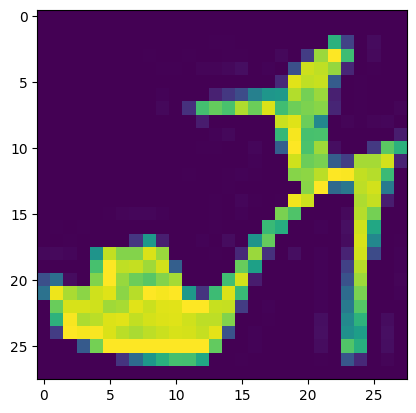

In [4]:
#lets plot our data
import matplotlib.pyplot as plt
plt.imshow(train_data[9])
print(train_labels[9])

In [5]:
#Create a small list to index the labels to their output classes check it from
#https://github.com/zalandoresearch/fashion-mnist

class_labels=[
'T-shirt/top',
'Trouser',
'Pullover',
'Dress',
'Coat',
'Sandal',
'Shirt',
'Sneaker',
'Bag',
'Ankle boot']

len(class_labels) #10 hence multiclass classification

10

T-shirt/top


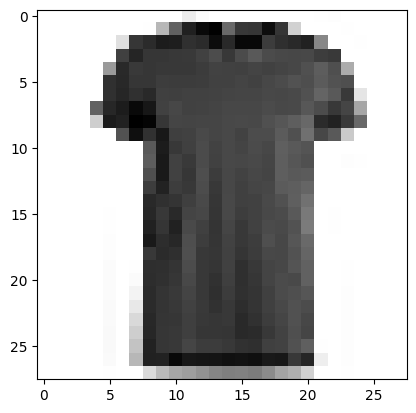

In [6]:
#plot example image and its label
index=17
plt.imshow(train_data[index],cmap=plt.cm.binary)
print(class_labels[train_labels[index]])

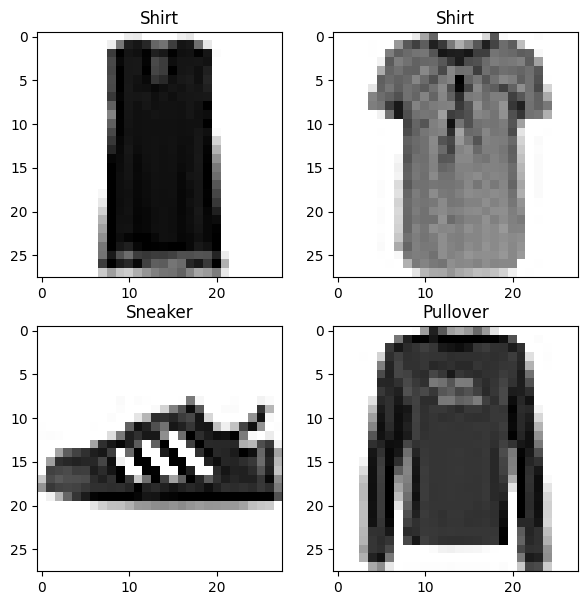

In [7]:
#plot multiple items from fashion mnist

import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_labels[train_labels[rand_index]])

#Building our mutliclass classification model

we can use similar to binary classification model
but we need to take care of few things:

* Input shape = 28*28 (the shape of one image)
* Output shape = 10 (no of classes)
* Output layer actiavtion = *softmax*
* If the labels are one hot encoded use Loss function - tf.kears.losses.CategoricalCrossentropy()
* If the labels are numeric encoded use Loss function - tf.kears.losses.SparseCategoricalCrossentropy() (like our current case)
* You can always convert numeric encoding to one hot using the `tf.one_hot(labels,depth=no of classes)`
* Flatten our input shape from 28 x 28 to 784(i.e 28 x 28)

In [8]:
# how flatten works changing (28*28 to none,748)
flatten_model=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


(None, 784)

In [9]:
28*28

784

In [10]:
#lets rebuild the same model architecture we used in binary classification

tf.random.set_seed(42)

#create model

model_1=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(5,activation='relu'),
    tf.keras.layers.Dense(5,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

#compile model
model_1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

#Fit model
not_norm=model_1.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.0985 - loss: 3.5005 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0984 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - 

In [11]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │         3,925 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,047 (47.06 KB)

 Trainable params: 4,015 (15.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,032 (31.38 KB)

In [12]:
#check the min and max of our data
train_data.min(),train_data.max()

(np.uint8(0), np.uint8(255))

### Neural Networks prefer data to be scaled(or normalized) , this means they like to have the numbers between 0 and 1

In [13]:
# we can get our training and test data between 0 and 1 by dividing them by maximum

train_data_norm=train_data/255
test_data_norm=test_data/255

#checking min and max of training data
train_data_norm.min(),train_data_norm.max()

(np.float64(0.0), np.float64(1.0))

In [14]:
#now our data is normalized lets find patterns again

tf.random.set_seed(42)

#create model
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

#compile model

model_2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

#fit model

norm=model_2.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3075 - loss: 1.6776 - val_accuracy: 0.6001 - val_loss: 1.0489
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6020 - loss: 1.0002 - val_accuracy: 0.6494 - val_loss: 0.9360
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6571 - loss: 0.9049 - val_accuracy: 0.6613 - val_loss: 0.8807
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6739 - loss: 0.8523 - val_accuracy: 0.6718 - val_loss: 0.8457
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6839 - loss: 0.8194 - val_accuracy: 0.6783 - val_loss: 0.8197
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6933 - loss: 0.7937 - val_accuracy: 0.6888 - val_loss: 0.8023
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7004 - loss: 0.7751 - val_accuracy: 0.6939 - val_loss: 0.7844
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7109 - loss: 0.7562 - 

<Axes: title={'center': 'Normalized-Model'}>

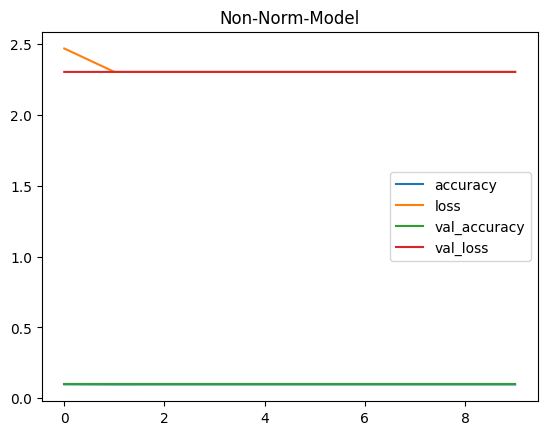

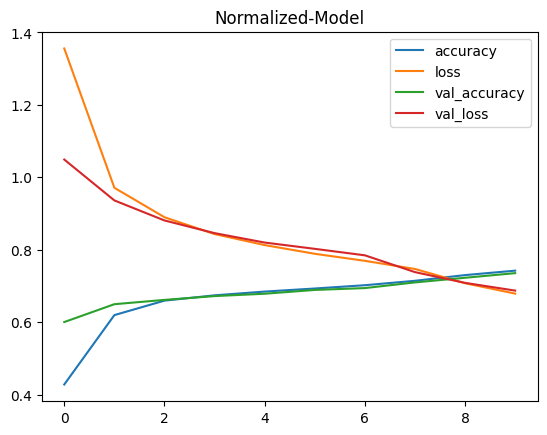

In [15]:
import pandas as pd

non_norm_hist=pd.DataFrame(not_norm.history)
norm_hist=pd.DataFrame(norm.history)
non_norm_hist.plot(title='Non-Norm-Model')
norm_hist.plot(title='Normalized-Model')

**Note:** Same model with slightly different data can produce *varied results*

# Finding the ideal learning rate

In [16]:
#now our data is normalized lets find patterns again

tf.random.set_seed(42)

#create model
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

#compile model

model_3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

#learning rate scheduler
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

#fit model
lr_hist=model_3.fit(train_data_norm,train_labels,epochs=40,validation_data=(test_data_norm,test_labels),callbacks=[lr_scheduler])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3782 - loss: 1.5420 - val_accuracy: 0.7231 - val_loss: 0.7513 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7368 - loss: 0.7196 - val_accuracy: 0.7680 - val_loss: 0.6745 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7663 - loss: 0.6620 - val_accuracy: 0.7727 - val_loss: 0.6570 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7743 - loss: 0.6433 - val_accuracy: 0.7757 - val_loss: 0.6508 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7779 - loss: 0.6337 - val_accuracy: 0.7771 - val_loss: 0.6477 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7809 - loss: 0.6278 - val_accuracy: 0.7806 - val_loss: 0.6450 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7829 - l

Text(0.5, 1.0, 'Finding Ideal Learning rate')

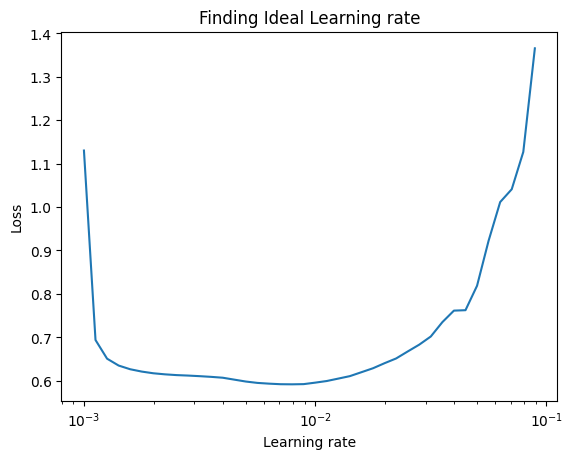

In [17]:
#plot learning rate decay curve

import numpy as np

lrs=1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs,lr_hist.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Finding Ideal Learning rate')

In [18]:
10**-3

0.001

In [19]:
#lets refit the model with ideal learning rate

#now our data is normalized lets find patterns again

tf.random.set_seed(42)

#create model
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

#compile model

model_3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)


#fit model
lr_hist=model_3.fit(train_data_norm,
                    train_labels,
                    epochs=20,
                    validation_data=(test_data_norm,test_labels),
                    callbacks=[lr_scheduler])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4409 - loss: 1.4348 - val_accuracy: 0.7070 - val_loss: 0.8170 - learning_rate: 0.0010
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7373 - loss: 0.7590 - val_accuracy: 0.7886 - val_loss: 0.6367 - learning_rate: 0.0011
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7960 - loss: 0.6070 - val_accuracy: 0.7991 - val_loss: 0.5909 - learning_rate: 0.0013
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8055 - loss: 0.5682 - val_accuracy: 0.8020 - val_loss: 0.5698 - learning_rate: 0.0014
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8110 - loss: 0.5504 - val_accuracy: 0.8051 - val_loss: 0.5590 - learning_rate: 0.0016
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8144 - loss: 0.5404 - val_accuracy: 0.8066 - val_loss: 0.5559 - learning_rate: 0.0018
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8165 - l

# Evaluating our multiclass classification model

To evaluate our multiclass classification model we could:

* Evaluate its performance using classification metrics like confusion_matrix
* Asses some of its predictions (Through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* save and export it for use in an application

Let's go through the top 2

In [20]:
#create a confusion matrix like we did in binary classification



import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10)):


  #create confusion matirx
  cm=confusion_matrix(y_true,y_pred)
  cm_norm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis] #normalize our matrix
  n_classes=cm.shape[0]

  #lets pretiffy it
  fig,ax=plt.subplots(figsize=figsize)
  #create a matrix plot
  cax=ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)


  if classes:
    labels=classes
  else:
    labels=np.arange(cm.shape[0])

  #label the axes
  ax.set(title='Confusion Matrix',
        xlabel='Predicted Label',
        ylabel='True Label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  #see the threshold for different colors
  threshold=(cm.min()+cm.max())/2.


  #plot the text in each cell
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f'{cm[i,j]}({cm_norm[i,j]*100:.1f}%)',
            horizontalalignment='center',
            color='white'if cm[i,j]>threshold else 'black',size=15)


In [21]:
y_pred=model_3.predict(test_data_norm)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.16156472e-04, 1.16634568e-04, 1.65399877e-06, 3.55509110e-05,
        3.17114260e-04, 1.59937724e-01, 5.98692335e-04, 1.05039120e-01,
        1.24400598e-03, 7.32593298e-01],
       [1.90167187e-03, 4.66258712e-07, 9.06862319e-01, 1.22136066e-06,
        3.67800263e-03, 1.13505176e-43, 8.75563920e-02, 0.00000000e+00,
        2.38047964e-08, 1.72261620e-41],
       [2.32373422e-05, 9.99462426e-01, 1.11220515e-07, 3.75005766e-05,
        4.31233755e-04, 2.28127416e-22, 4.54886540e-05, 1.16822246e-30,
        1.40780432e-12, 2.85564588e-14],
       [4.54043147e-05, 9.99700844e-01, 6.69431373e-08, 7.26467260e-05,
        1.49531261e-04, 2.27463132e-22, 3.12910670e-05, 6.39561161e-30,
        8.27591359e-13, 3.01023787e-14],
       [1.39379218e-01, 6.03302557e-04, 2.97915161e-01, 5.51140532e-02,
        3.67803052e-02, 3.70230512e-14, 4.65943009e-01, 9.35430185e-20,
        4.26496565e-03, 2.01099640e-15]], dtype=float32)

In [22]:
# we get output of prediction as prediciton probabilities

class_labels[tf.argmax(y_pred[9])]

'Sneaker'

In [23]:
# we have our class lables list
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [24]:
 from sklearn.metrics import confusion_matrix

 confusion_matrix(y_true=test_labels,
                  y_pred=y_pred.argmax(axis=1))

array([[756,   5,  35,  69,   1,   1, 115,   0,  16,   2],
       [  3, 949,   5,  29,   7,   0,   6,   0,   1,   0],
       [ 15,   1, 778,  20,  80,   0, 105,   0,   1,   0],
       [ 33,  13,  63, 816,  26,   0,  43,   0,   6,   0],
       [  0,   1, 249,  15, 549,   0, 183,   0,   3,   0],
       [  0,   0,   0,   1,   0, 898,   0,  50,  16,  35],
       [129,   4, 173,  47,  54,   0, 568,   0,  25,   0],
       [  0,   0,   0,   0,   0,  31,   0, 942,   1,  26],
       [  2,   0,   5,   6,   2,  10,  46,   6, 923,   0],
       [  0,   0,   0,   0,   0,  25,   0,  81,   1, 893]])

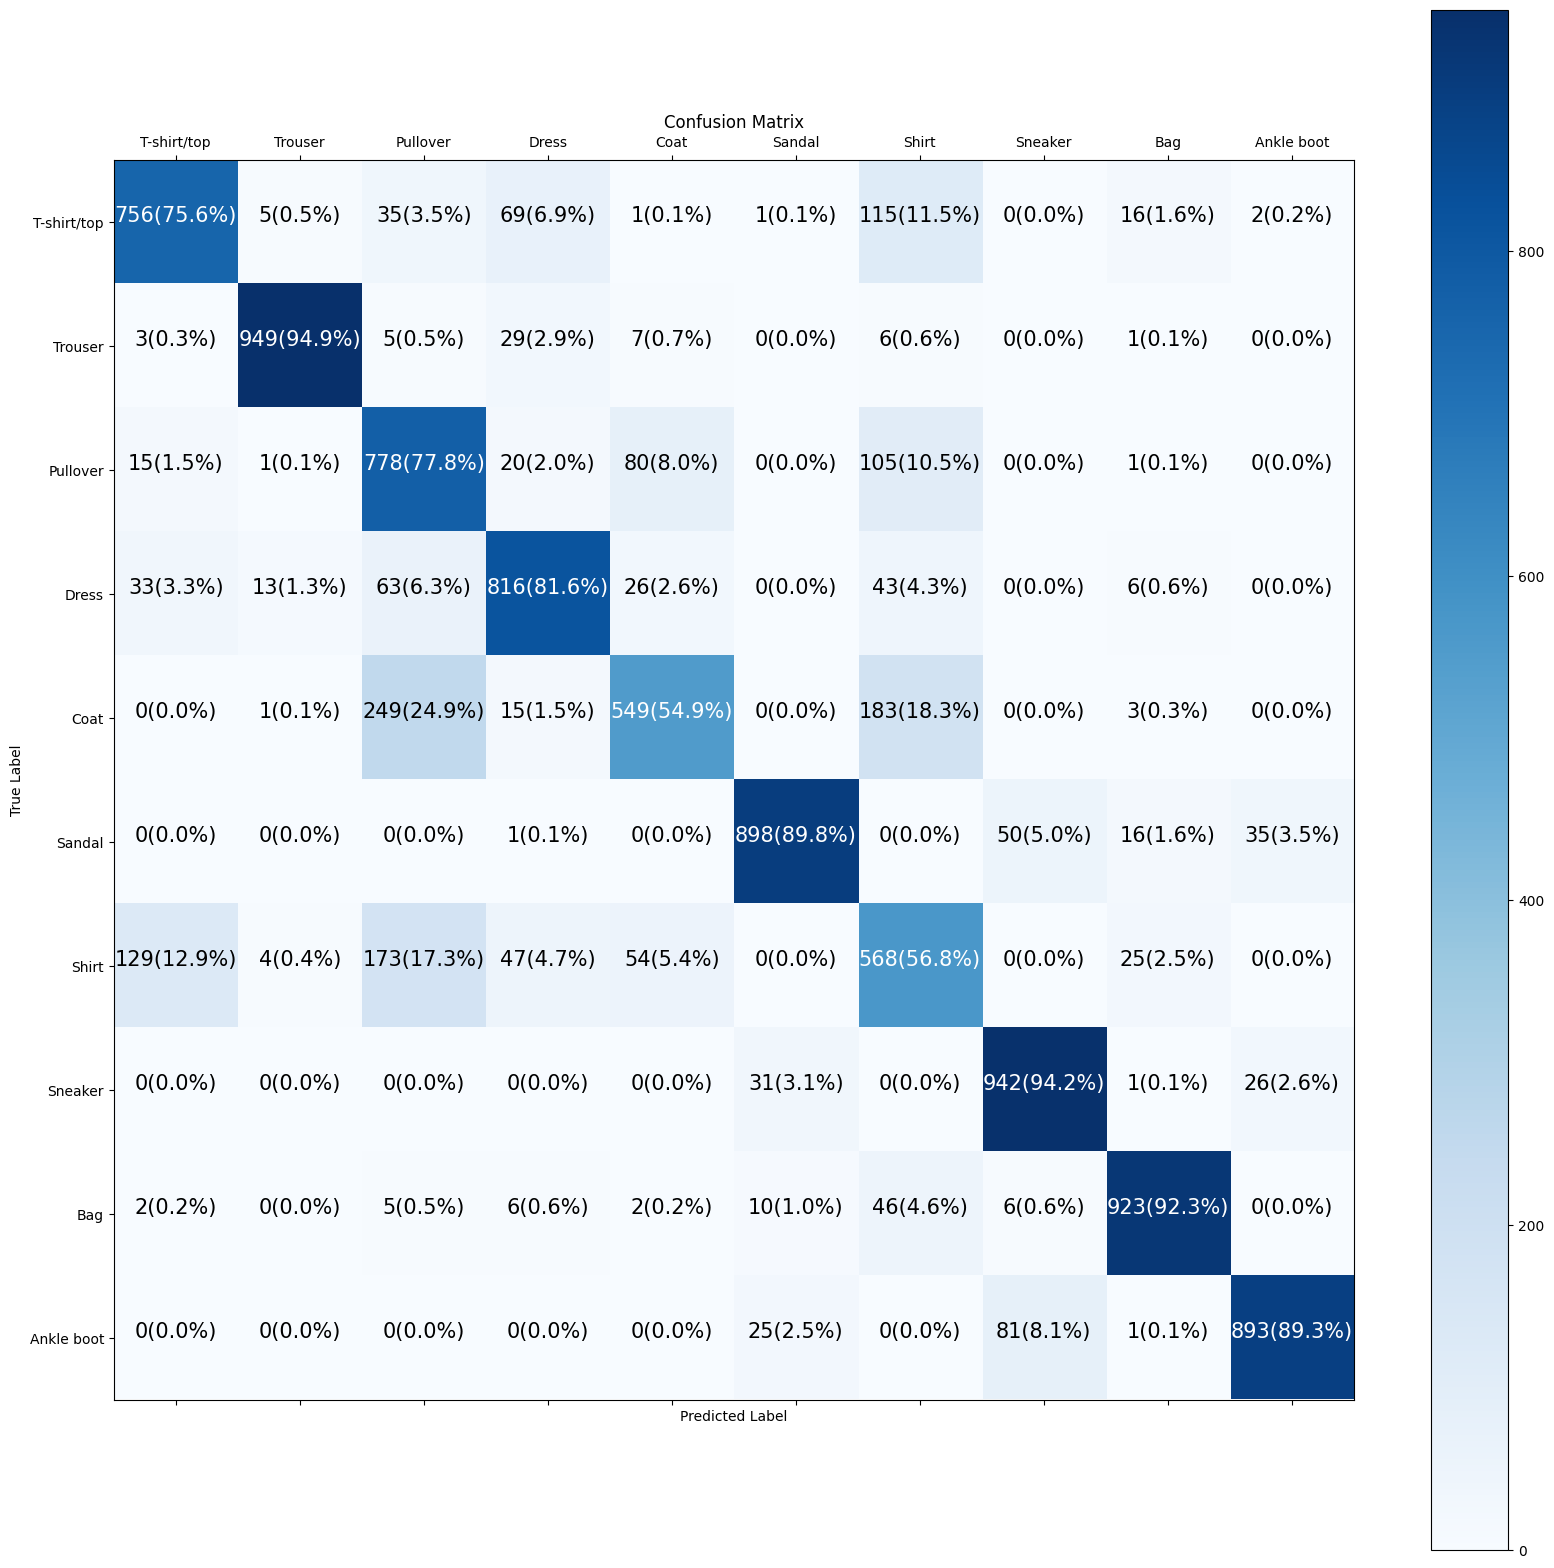

In [25]:
#lets print our custom matrix

make_confusion_matrix(y_true=test_labels,y_pred=y_pred.argmax(axis=1),classes=class_labels,figsize=(20,20))

### Often working with image datasets its important to visualize to understand the further developments

let's build a function to:
* Plot a random image
* Make a prediction on image
* Label the plot with truth label and predicted label

In [26]:
import random

def plot_random_image(model,images,true_labels,classes):

  #pick a random num
  ind=random.choice(range(len(test_data)))

  #Create predictions and targets
  target_image=images[ind]
  pred_prob=model.predict(target_image.reshape(1,28,28))
  pred_label=classes[pred_prob.argmax()]
  true_label=classes[true_labels[ind]]

  #plot the image
  plt.imshow(target_image,cmap=plt.cm.binary)

  #change the color of titles based on if prediciton is right or wrong
  if pred_label==true_label:
    color='green'
  else:
    color='red'

  #add xlabel info (prediction vs label)
  plt.xlabel(f'Pred: {pred_label} {100*tf.reduce_max(pred_prob):.0f}% (True:{true_label})',color=color)





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


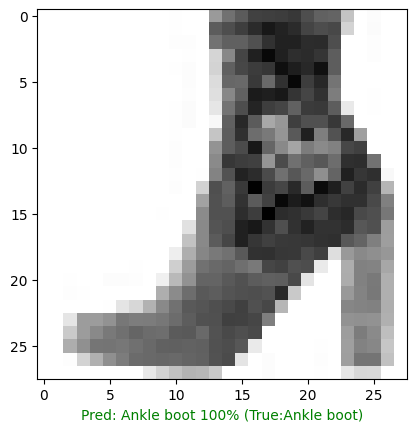

In [27]:
#lets check random samples

plot_random_image(model=model_3,images=test_data,true_labels=test_labels,classes=class_labels)

# What patterns is our model learning?
# Weights and Biases

* Weights start off as random generated by glorot randomness by default and then learn as per out data in each epoch and optimize by the optimizer
*Every hidden unit has a weight matrix
* The weight matirx has one record per data point by no of neurons in here example shape is (728 *4) 728 is size of sample and 4 are units
* The Bias vector is initialized by zeros in dense layer
* Biases the vector holds each bias for each neuron per layer
* The bias vector influences how much patterns within the corresponding weights matrix should influence the next layer

In [28]:
#find the layers of our model
model_3.layers

[<Flatten name=flatten_4, built=True>,
 <Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=dense_11, built=True>]

In [29]:
model_3.layers[1]

<Dense name=dense_9, built=True>

In [36]:
#get the patterns of a layer in our network
weights,biases = model_3.layers[1].get_weights()
weights, weights.shape

(array([[-4.2278343e-01,  2.7422271e+00, -2.1721900e+00, -1.2345763e+00],
        [ 1.0930393e+00,  3.7586060e+00, -3.2513797e+00, -1.2632962e-01],
        [-1.6343688e+00,  2.0601742e+00, -1.5506353e+00,  5.7519263e-01],
        ...,
        [-1.5353198e+00,  9.4103062e-01, -1.1796942e+00, -6.7206866e-01],
        [ 7.3406029e-01, -1.8161025e-03, -1.1699129e-01, -3.6697733e+00],
        [ 2.1655114e-01,  2.2696929e+00, -7.8107369e-01, -2.0697527e+00]],
       dtype=float32),
 (784, 4))

In [37]:
28*28

784

In [38]:
model_3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [39]:
biases, biases.shape

(array([1.9667225, 4.736114 , 1.0802189, 3.3133466], dtype=float32), (4,))

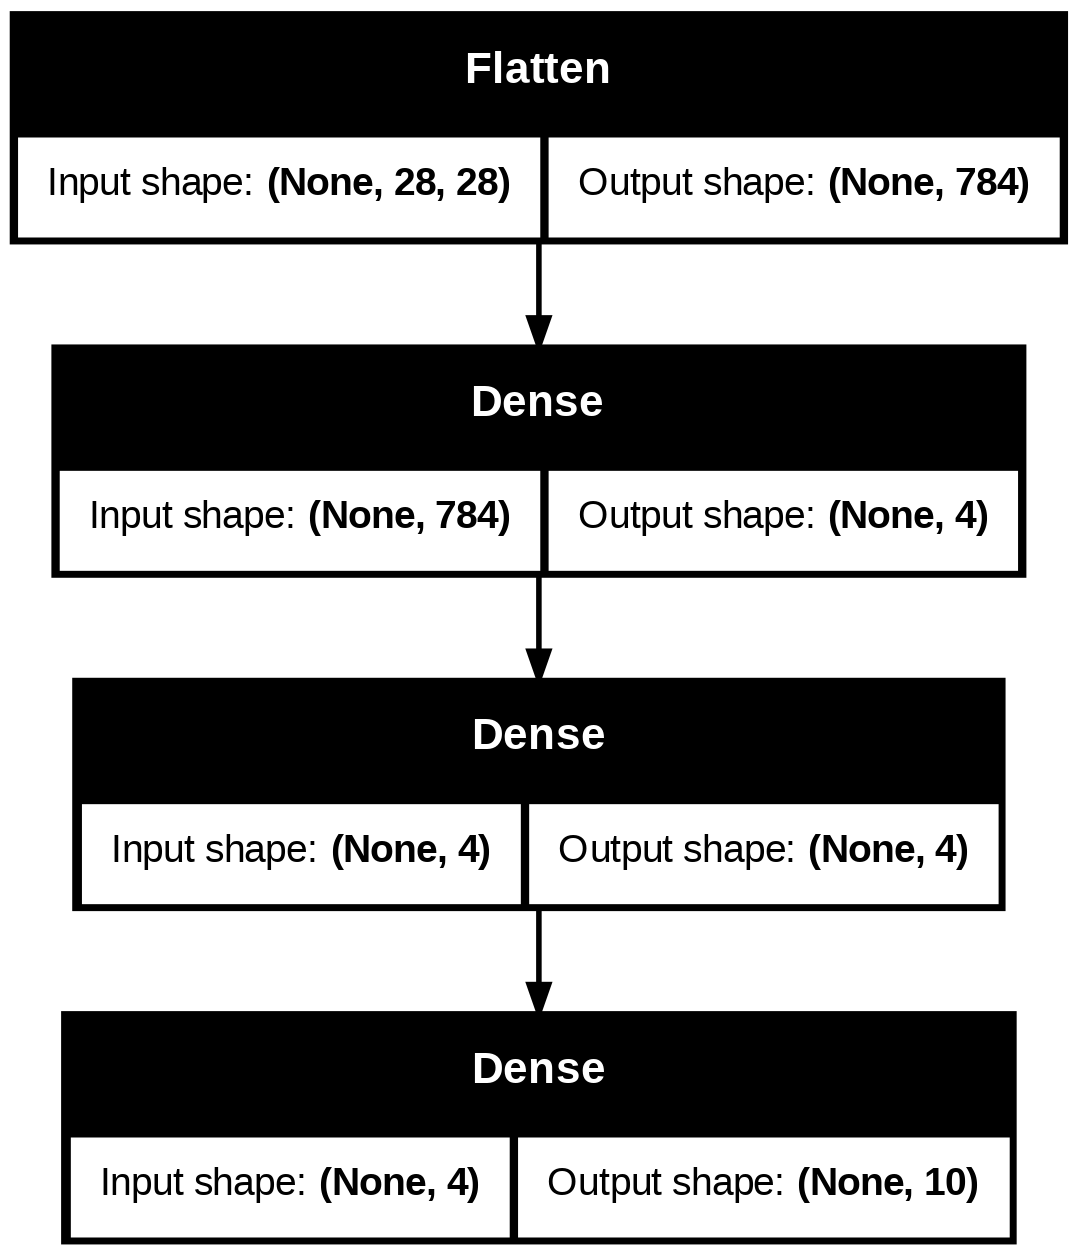

In [40]:
#lets check other way of viewing our model
from tensorflow.keras.utils import plot_model
#see inputs and outputs of each layer

plot_model(model_3,show_shapes=True)